In [1]:
#Importing the required libraries

In [1]:

pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from tensorflow.keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization
from tensorflow.keras.models import load_model
from PIL import Image

In [3]:
#Loading the Data

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

In [5]:
#Analyzing the Data

In [6]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

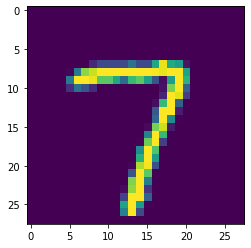

In [8]:
plt.imshow(x_train[5100])

In [9]:
np.argmax(y_train[5100])


0

In [10]:
#Reshaping the Data

In [11]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [12]:
#Applying one hot encoding

In [13]:
classes = 10 

In [14]:
y_train = np_utils.to_categorical (y_train, classes) 
y_test = np_utils.to_categorical (y_test, classes)

In [15]:
#Adding  CNN Buliding

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))

In [18]:
model.add(Conv2D(64,(3,3),activation='relu'))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(classes,activation='softmax'))

In [21]:
#Compiling The Model

In [22]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [23]:
#Training the Model

In [24]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 253s 135ms/step - loss: 0.2889 - accuracy: 0.9528 - val_loss: 0.0874 - val_accuracy: 0.9723
Epoch 2/5
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0672 - accuracy: 0.9791 - val_loss: 0.0887 - val_accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0993 - val_accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 252s 135ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0992 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0976 - val_accuracy: 0.9778


In [25]:
#Observing The Metrics

In [26]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrice(Test loss & Test Accuracy):")
print(metrics)

Metrice(Test loss & Test Accuracy):
[0.09761691838502884, 0.9778000116348267]


In [ ]:
#Test the Model

In [27]:
prediction=model.predict(x_test[:4])
print(prediction)

[[2.7848351e-12 9.2536662e-18 3.7726891e-10 8.0811136e-10 5.3799346e-19
  2.1044585e-12 8.4699854e-21 1.0000000e+00 4.9765195e-11 1.0808950e-11]
 [7.4646872e-11 2.1474064e-12 1.0000000e+00 8.9329266e-13 1.0118599e-17
  3.3080126e-20 2.7792489e-11 1.4025427e-16 1.5575185e-12 1.0404296e-17]
 [1.3703209e-06 9.7610283e-01 3.1977688e-04 7.0401036e-09 1.9350386e-04
  1.3115884e-04 7.0677061e-07 1.8843772e-07 2.3250474e-02 1.6867181e-08]
 [1.0000000e+00 1.2926307e-15 2.9299549e-12 4.9638820e-15 2.6830707e-14
  6.6624115e-13 2.8371394e-09 3.3609430e-14 2.3882602e-12 5.1549072e-09]]


In [28]:
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [29]:
#Saving the model

In [30]:
model.save("Model/digitrec.h5")

In [31]:
cd Model

/home/wsuser/work/Model


In [32]:
!tar -zcvf hdr_deployment.tgz digitrec.h5

digitrec.h5


In [35]:
ls -1

hdr_deployment.tgz
Model/


In [33]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 18.3 MB/s eta 0:00:01


In [34]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Qp0JIy3Ih7OklYqWlnFo6yqZhpobY2-zR8Cg6AtJk6Of"
}
client = APIClient(credentials)
client

In [35]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/1b783cf7b8e94dde8c5b6c88f4f7d43c:eb4ae3d5-0f83-400d-9fdb-78d337230cdf::',
      'guid': 'eb4ae3d5-0f83-400d-9fdb-78d337230cdf',
      'name': 'Watson Machine Learning-jo',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Models',
    'scope': {'bss_account_id': '1b783cf7b8e94dde8c5b6c88f4f7d43c'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '4bec7430-9d9b-4641-8645-7046bd26ba4d',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '8e8969d3786b41468c822ab135928c8e',
        'api_key': 'IzEXVgX1RTF7PZzNkc3JB5kSPazoktItiKYu_XcBNF6e',
        'secret_access_key': '415351cb7372b1f7032cb2b819478da11b8a9fcc0bf6caee',
        'service_id': 'ServiceId-0649a009-5d7f-4e40-ac8e-93986b1ab1d9'},
       'editor': {'access_key_id': '4c52326aa19d46a4ae9c5e81a4446dea',
        'api_key': 'G3

In [38]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])
 

In [41]:
space_uid = guid_from_space_name(client,'Models')
print("Space UID = " + space_uid)

Space UID = b8d39f77-3c45-495a-a536-b9a9c14920b1


In [44]:
client.set.default_space(space_uid)

'SUCCESS'

In [45]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [46]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [47]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [48]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T15:56:53.028Z',
  'id': 'ea77c4ee-3cfa-44fe-84b8-ad41bd396e3b',
  'modified_at': '2022-11-19T15:56:56.317Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-667000G6CO',
  'resource_key': 'c95499e6-f0ce-4fc3-b37d-c7026418d444',
  'space_id': 'b8d39f77-3c45-495a-a536-b9a9c14920b1'},
 'system': {'warnings': []}}

In [50]:
model_id = client.repository.get_model_id(model_details)
model_id

'ea77c4ee-3cfa-44fe-84b8-ad41bd396e3b'

In [51]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/Model/DigitRecog_IBM_model.tar.gz'

In [52]:
ls

digitrec.h5  DigitRecog_IBM_model.tar.gz  hdr_deployment.tgz


In [53]:
#Test with Saved Model

In [54]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [55]:
model = load_model("Model/digitrec.h5")

OSError: No file or directory found at Model/digitrec.h5

In [56]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='bSERpNH2Xkz8r_sYJqmAMF3Wx1azB_b2ZyfoRcIaj2OG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'anovelmethodforhandwrittendigitre-donotdelete-pr-g3go0qmnp30anx'
object_key = 'test1.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [57]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [58]:
img

In [59]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [60]:
pred = model.predict(im2arr)
print(pred)

[[4.6589282e-01 5.7595188e-04 3.1891462e-04 5.2080679e-01 1.6300041e-03
  1.1818615e-05 8.2754600e-04 4.7890280e-05 1.3585570e-03 8.5297897e-03]]


In [68]:
print(np.argmax(pred, axis=1)) #printing our Labels

[0]
